<a href="https://colab.research.google.com/github/mrafaelbatista/uniesp_mba_machine_learning/blob/main/classwork/PosDados_ML_Atividade_02_Iris_Classifica%C3%A7%C3%A3o_Dataset_Iris_(CSV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBA em Engenharia e Ciência de Dados<br />
Machine Learning

# Instalação de Pacotes

É possível instalar pacotes de maneira muito simples no Google Colab. Utilize o comando abaixo como exemplo:

`!pip install pandas`

No exemplo, podemos verificar a instalação do pandas. De forma similar utilize para instalar outras bibliotecas.

# Importação das bibliotecas

Algumas bibliotecas não estão disponíveis por padrão no código Python que será utilizado para resolução dos problemas que envolvem Ciência de Dados.

Abaixo um código de exemplo de como importar o sklearn.

`from sklearn.svm import LinearSVR`

O exemplo tem como requisito a instalação do pacote sklearn e neste exemplo está importando o Linear SVR.

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Datasets
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Leitura da Base de Dados

A base de dados que será utilizada pode ter diversas fontes, como visto na disciplina de Inferência Estatística e Data Mining.

`pd.read_csv('data.csv') ` <br />
`pd.read_excel('tmp.xlsx', index_col=0)` <br />
`pd.read_json('meu_json.json')`

Estes são alguns exemplos de leitura de arquivos. Mas, pode ser necessário a leitura de outro tipo de base de dados.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mrafaelbatista/uniesp-mba-dados-machine-learning/master/db/iris_data.csv')

# Visualização dos Dados

É possível utilizar funções como df.head(), ou mesmo plotar algum gráfico para compreender o comportamento dos dados.

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_names
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
target_names = df['target_names'].unique()

In [ ]:
# Dicionário de mapeamento
mapeamento_target = {
    target_names[0]:0,
    target_names[1]:1,
    target_names[2]:2
}

mapeamento_target

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [ ]:
df['target'] = df['target_names'].map(mapeamento_target)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_names,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# Pré-Processamento
*Apenas se necessário* realizar o pré-processamento. Em casos de estudo a base de dados costuma já ser trabalhada e pronta para os testes. Por outro lado, no mundo real, esta é uma etapa importante.

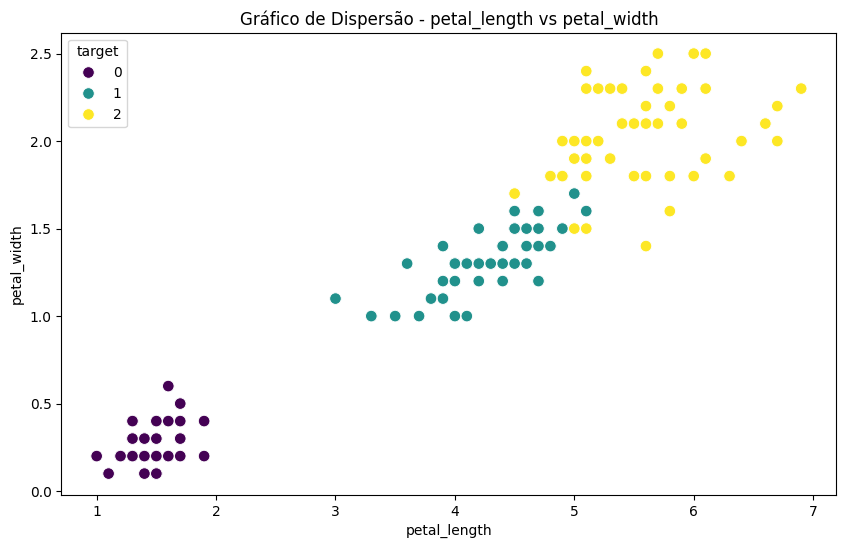

In [ ]:
# Escolher as melhores colunas para visualização
melhores_colunas = ['petal_length', 'petal_width']

# Criar um gráfico de dispersão usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=melhores_colunas[0], y=melhores_colunas[1], hue='target', data=df, palette='viridis', s=70)

# Adicionar rótulos e legendas
plt.title(f'Gráfico de Dispersão - {melhores_colunas[0]} vs {melhores_colunas[1]}')
plt.show()

# Separação em Treino e Teste

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_names,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# Separar os valores de X e y
X = df.drop(['target', 'target_names'], axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

# Construção dos Modelos

## DecisionTree

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
feature_names = df.columns.drop(['target_names', 'target'])
feature_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

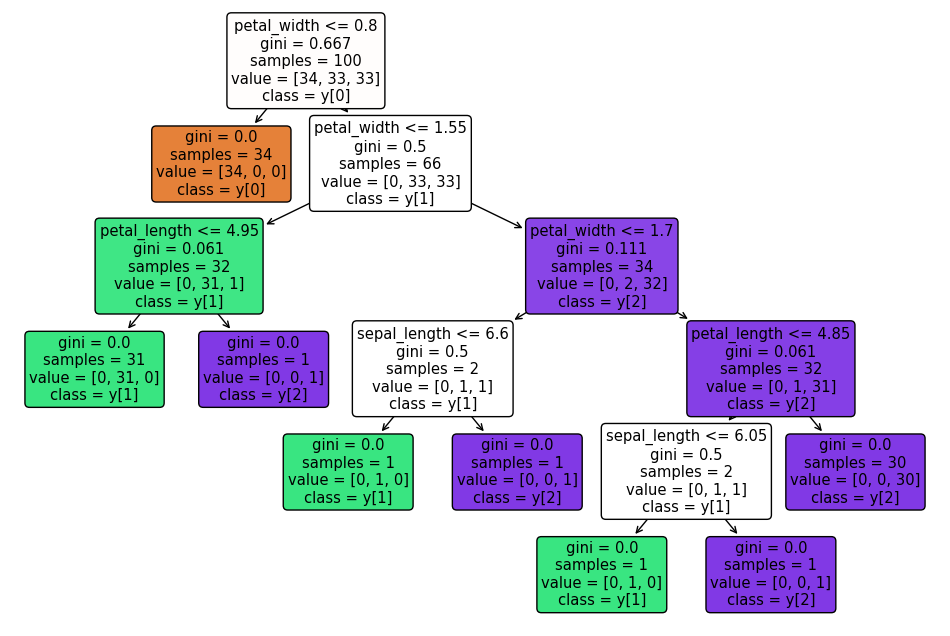

In [ ]:
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura conforme necessário
plot_tree(clf_dt, class_names=True, filled=True, rounded=True, feature_names=feature_names)
plt.show()

### Avaliação das Métricas

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.94

In [ ]:
matriz_confusao_dt = confusion_matrix(y_pred_dt, y_test)

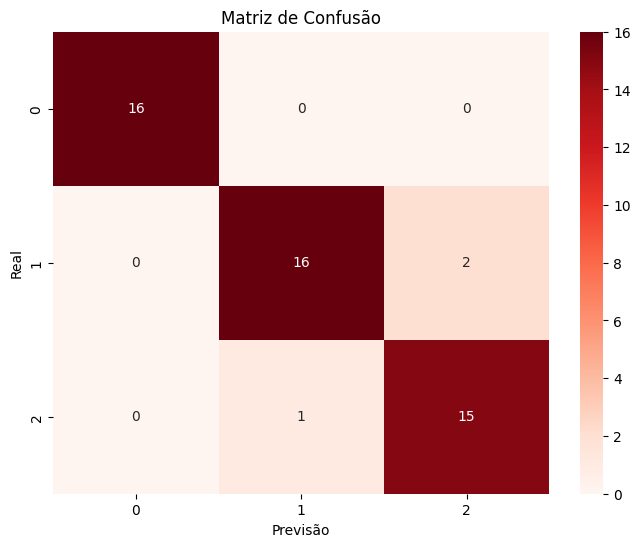

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_dt, annot=True, fmt='d', cmap='Reds',
            xticklabels=clf_dt.classes_, yticklabels=clf_dt.classes_)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## LinearSVC

In [ ]:
clf = LinearSVC()
clf = clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_pred = clf.predict(X_test)

### Avaliação das Métricas

In [ ]:
# Acurácia
accuracy_score(y_test, y_pred)

0.9

In [ ]:
matriz_confusao = confusion_matrix(y_pred, y_test)

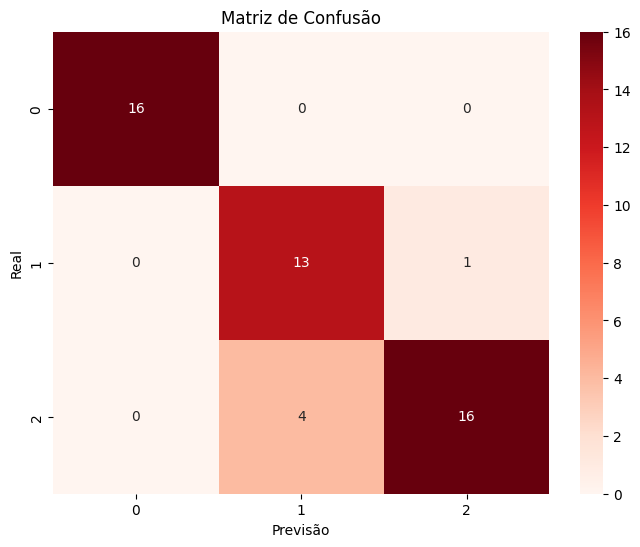

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Reds',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()